In [237]:
import pandas as pd 
import numpy as np
from sklearn import metrics
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [313]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [345]:
# https://archive.ics.uci.edu/ml/datasets/South+German+Credit

df = pd.read_table('SouthGermanCredit.asc', sep="\s+")
df.dropna()
df

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


In [346]:
df.columns


Index(['laufkont', 'laufzeit', 'moral', 'verw', 'hoehe', 'sparkont', 'beszeit',
       'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter', 'weitkred',
       'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb', 'kredit'],
      dtype='object')

array([[<AxesSubplot:title={'center':'gastarb'}>]], dtype=object)

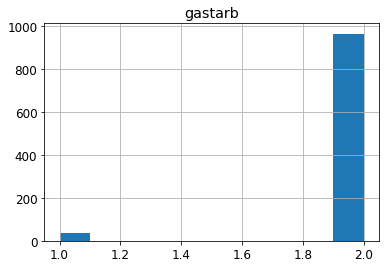

In [347]:
df.hist('gastarb')

In [348]:
for col in ['laufkont', 'laufzeit', 'moral', 'verw', 'hoehe', 'sparkont', 'beszeit',
       'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter', 'weitkred',
       'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb']:
    bins = 4
    minv = df[col].min()
    maxv = df[col].max()
    space = maxv - minv
    k = 0
    for i in np.linspace(minv + space / bins, maxv - space / bins, bins):
        df[col + '_' + str(k)] = (df[col] >= i).astype(int)
        k += 1
    df = df.drop(col, axis=1)

In [349]:
df

,kredit,laufkont_0,laufkont_1,laufkont_2,laufkont_3,laufzeit_0,laufzeit_1,laufzeit_2,laufzeit_3,moral_0,...,pers_2,pers_3,telef_0,telef_1,telef_2,telef_3,gastarb_0,gastarb_1,gastarb_2,gastarb_3
0,1,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,1,1,1,1
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,1,1
2,1,1,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,1,1,1,1
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,1,1,1
996,0,0,0,0,0,1,0,0,0,1,...,1,1,0,0,0,0,1,1,1,1
997,0,1,1,1,1,1,0,0,0,1,...,1,1,1,1,1,1,1,1,1,1
998,0,1,0,0,0,0,0,0,0,1,...,1,1,1,1,1,1,1,1,1,1


In [350]:
class LazyClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, threshold=0.1):
        self.threshold = threshold
    
    def fit(self,X,y):
        X, y = check_X_y(X, y)
        self.X = X
        self.y = y
        self.X_pos = X[y == 1]
        self.X_neg = X[y == 0]
        
        return self
        
    def predict(self, X):
        X = check_array(X)
        y_pred = []
        
        for x in X:
            num_pos = 0
            num_neg = 0
            
            for pos_x in self.X_pos:
                if np.sum(x == pos_x)> int(len(pos_x)*self.threshold):
                    num_pos += 1
            for neg_x in self.X_neg:
                if np.sum(x == neg_x) > int(len(neg_x)*self.threshold):
                    num_neg += 1
            
            num_pos = num_pos / float(len(self.X_pos))     
            num_neg = num_neg / float(len(self.X_neg))
            
            if (num_pos > num_neg):
                y_pred.append(1)
            else:
                y_pred.append(0)

        return np.array(y_pred)

In [351]:
X = df.drop('kredit', axis = 1)
y = df.kredit

In [352]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [353]:
def print_metr(y_test, y_pred):
    TP = np.sum(y_test & y_pred)
    TN = np.sum(y_test + y_pred == 0)
    FP = np.sum((y_test  == 0) & (y_pred == 1))
    FN = np.sum((y_test  == 1) & (y_pred == 0))
    
    TPR = float(TP) / (TP + FN)
    TNR = float(TN) / (TN + FP)
    FPR = float(FP) / (FP + TN)
    NPV = float(TN) / (TN + FN)
    FDR = float(FP) / (TP + FP)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    
    print(  "True positive:", TP ,"\n" 
            "True Negative:", TN,"\n"
            "False Positive:", FP,"\n"
            "False Negative:", FN,"\n"
            "True Positive Rate:", TPR,"\n"
            "True Negative Rate:", TNR,"\n"
            "Negative Predictive Value:", NPV,"\n"
            "False Positive Rate:",FPR,"\n"
            "False Discovery Rate:",FDR,"\n"
            "Accuracy:", accuracy,"\n"
            "Precision:", precision,"\n"
            "Recall:", recall,"\n"
            "F1 score:", f1
            )

In [354]:
for treshold in np.linspace(0.1, 1, 10):
    pred = LazyClassifier(treshold)
    pred.fit(X, y)
    y_pred1 = pred.predict(X_test)
    
    print("\n treshold:", treshold)
    print(print_metr(y_test, y_pred1))


 treshold: 0.1
True positive: 0 
True Negative: 98 
False Positive: 0 
False Negative: 202 
True Positive Rate: 0.0 
True Negative Rate: 1.0 
Negative Predictive Value: 0.32666666666666666 
False Positive Rate: 0.0 
False Discovery Rate: nan 
Accuracy: 0.32666666666666666 
Precision: 0.0 
Recall: 0.0 
F1 score: 0.0
None


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



 treshold: 0.2
True positive: 0 
True Negative: 98 
False Positive: 0 
False Negative: 202 
True Positive Rate: 0.0 
True Negative Rate: 1.0 
Negative Predictive Value: 0.32666666666666666 
False Positive Rate: 0.0 
False Discovery Rate: nan 
Accuracy: 0.32666666666666666 
Precision: 0.0 
Recall: 0.0 
F1 score: 0.0
None


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



 treshold: 0.30000000000000004
True positive: 0 
True Negative: 97 
False Positive: 1 
False Negative: 202 
True Positive Rate: 0.0 
True Negative Rate: 0.9897959183673469 
Negative Predictive Value: 0.32441471571906355 
False Positive Rate: 0.01020408163265306 
False Discovery Rate: 1.0 
Accuracy: 0.3233333333333333 
Precision: 0.0 
Recall: 0.0 
F1 score: 0.0
None

 treshold: 0.4
True positive: 19 
True Negative: 91 
False Positive: 7 
False Negative: 183 
True Positive Rate: 0.09405940594059406 
True Negative Rate: 0.9285714285714286 
Negative Predictive Value: 0.33211678832116787 
False Positive Rate: 0.07142857142857142 
False Discovery Rate: 0.2692307692307692 
Accuracy: 0.36666666666666664 
Precision: 0.7307692307692307 
Recall: 0.09405940594059406 
F1 score: 0.16666666666666666
None

 treshold: 0.5
True positive: 126 
True Negative: 68 
False Positive: 30 
False Negative: 76 
True Positive Rate: 0.6237623762376238 
True Negative Rate: 0.6938775510204082 
Negative Predictive Val

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [355]:
lazy = LazyClassifier(threshold=0.7)

In [356]:
lazy.fit(X_train, y_train)

LazyClassifier(threshold=0.7)

In [357]:
y_pred = lazy.predict(X_test)

In [358]:
print_metr(y_test, y_pred)

True positive: 139 
True Negative: 72 
False Positive: 26 
False Negative: 63 
True Positive Rate: 0.6881188118811881 
True Negative Rate: 0.7346938775510204 
Negative Predictive Value: 0.5333333333333333 
False Positive Rate: 0.2653061224489796 
False Discovery Rate: 0.15757575757575756 
Accuracy: 0.7033333333333334 
Precision: 0.8424242424242424 
Recall: 0.6881188118811881 
F1 score: 0.7574931880108992


In [359]:
lr = LogisticRegression(random_state=42)

In [360]:
lr.fit(X,y)

LogisticRegression(random_state=42)

In [361]:
lr_pred = lr.predict(X_test)

In [362]:
print_metr(y_test, lr_pred)

True positive: 176 
True Negative: 50 
False Positive: 48 
False Negative: 26 
True Positive Rate: 0.8712871287128713 
True Negative Rate: 0.5102040816326531 
Negative Predictive Value: 0.6578947368421053 
False Positive Rate: 0.4897959183673469 
False Discovery Rate: 0.21428571428571427 
Accuracy: 0.7533333333333333 
Precision: 0.7857142857142857 
Recall: 0.8712871287128713 
F1 score: 0.8262910798122066


In [363]:
kneigh = KNeighborsClassifier(n_neighbors=5)

In [364]:
kneigh.fit(X,y)

KNeighborsClassifier()

In [365]:
kneight_pred = kneigh.predict(X_test)

In [366]:
print_metr(y_test, kneight_pred)

True positive: 191 
True Negative: 56 
False Positive: 42 
False Negative: 11 
True Positive Rate: 0.9455445544554455 
True Negative Rate: 0.5714285714285714 
Negative Predictive Value: 0.835820895522388 
False Positive Rate: 0.42857142857142855 
False Discovery Rate: 0.18025751072961374 
Accuracy: 0.8233333333333334 
Precision: 0.8197424892703863 
Recall: 0.9455445544554455 
F1 score: 0.87816091954023


In [367]:
adaboost = AdaBoostClassifier(n_estimators=100, random_state=0)

In [368]:
adaboost.fit(X,y)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [369]:
ada_pred = adaboost.predict(X_test)

In [370]:
print_metr(y_test, ada_pred)

True positive: 176 
True Negative: 52 
False Positive: 46 
False Negative: 26 
True Positive Rate: 0.8712871287128713 
True Negative Rate: 0.5306122448979592 
Negative Predictive Value: 0.6666666666666666 
False Positive Rate: 0.46938775510204084 
False Discovery Rate: 0.2072072072072072 
Accuracy: 0.76 
Precision: 0.7927927927927928 
Recall: 0.8712871287128713 
F1 score: 0.8301886792452831


In [371]:
gpc = GaussianProcessClassifier(random_state=0).fit(X, y)

In [372]:
gpc_pred = gpc.predict(X_test)

In [373]:
print_metr(y_test, gpc_pred)

True positive: 202 
True Negative: 96 
False Positive: 2 
False Negative: 0 
True Positive Rate: 1.0 
True Negative Rate: 0.9795918367346939 
Negative Predictive Value: 1.0 
False Positive Rate: 0.02040816326530612 
False Discovery Rate: 0.00980392156862745 
Accuracy: 0.9933333333333333 
Precision: 0.9901960784313726 
Recall: 1.0 
F1 score: 0.9950738916256158


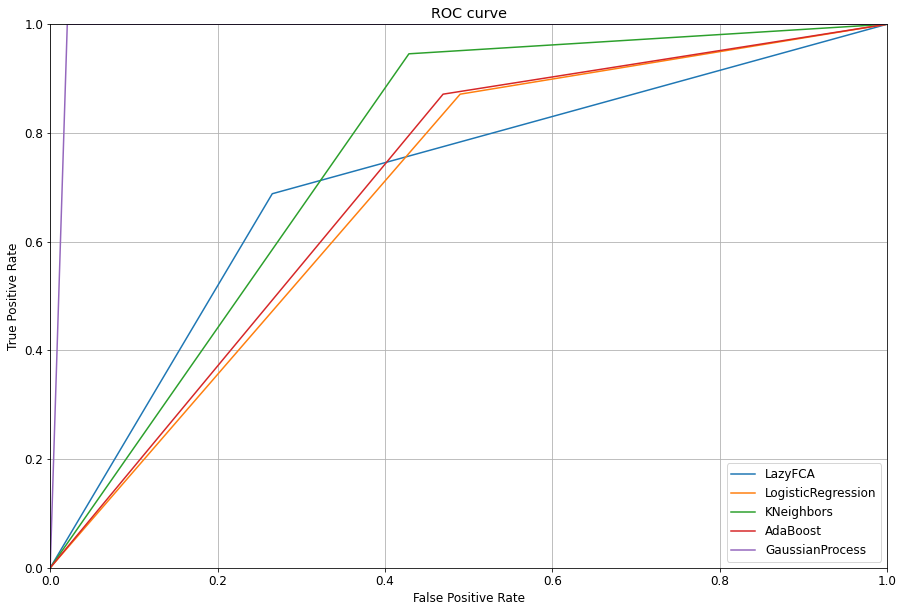

In [374]:
fp_rate,  tp_rate,  thresholds = metrics.roc_curve(y_test, y_pred)
fp_rate1, tp_rate1, thresholds1 = metrics.roc_curve(y_test, lr_pred)
fp_rate2, tp_rate2, thresholds1 = metrics.roc_curve(y_test, kneight_pred)
fp_rate3, tp_rate3, thresholds1 = metrics.roc_curve(y_test, ada_pred)
fp_rate4, tp_rate4, thresholds1 = metrics.roc_curve(y_test, gpc_pred)

fig = plt.figure(figsize=(15,10))

plt.plot(fp_rate, tp_rate,   label="LazyFCA")
plt.plot(fp_rate1, tp_rate1, label="LogisticRegression")
plt.plot(fp_rate2, tp_rate2, label="KNeighbors")
plt.plot(fp_rate3, tp_rate3, label="AdaBoost")
plt.plot(fp_rate4, tp_rate4, label="GaussianProcess")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.grid(True)
plt.legend()

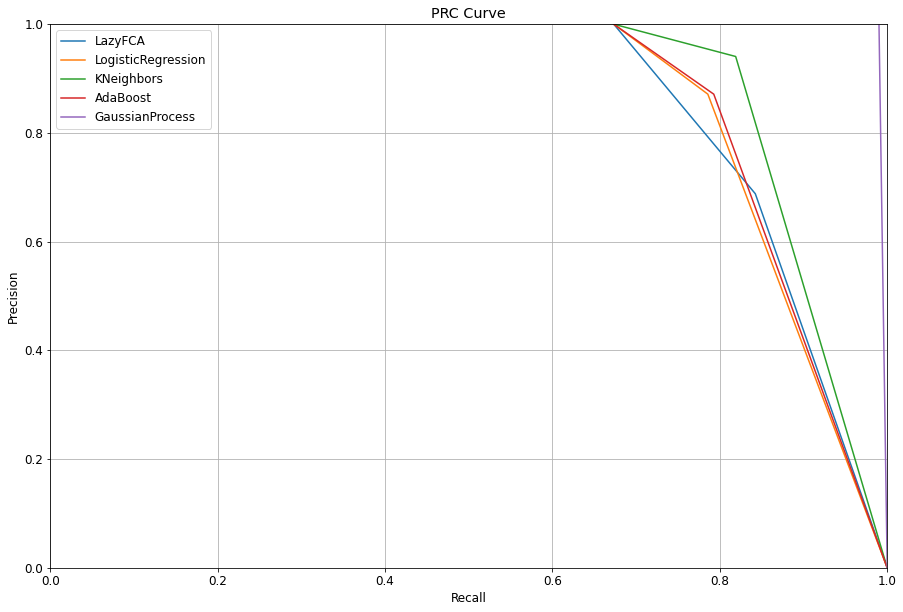

In [375]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred)
precision1, recall1, thresholds1 = metrics.precision_recall_curve(y_test, lr_pred)
precision2, recall2, thresholds2 = metrics.precision_recall_curve(y_test, neight_pred)
precision3, recall3, thresholds3 = metrics.precision_recall_curve(y_test, ada_pred)
precision4, recall4, thresholds4 = metrics.precision_recall_curve(y_test, gpc_pred)

fig = plt.figure(figsize=(15,10))

plt.plot(precision, recall, label="LazyFCA")
plt.plot(precision1, recall1, label="LogisticRegression")
plt.plot(precision2, recall2, label="KNeighbors")
plt.plot(precision3, recall3, label="AdaBoost")
plt.plot(precision4, recall4, label="GaussianProcess")

plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.rcParams['font.size'] = 12
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PRC Curve')
plt.grid(True)
plt.legend()